# PUC Minas
## Pós Graduação em Ciência de Dados e Big Data (2018-2019)
## Trabalho de Conclusão de Curso
### Aluno: Igor Ribeiro Braga

Este notebook é relativo ao meu Trabalho de Conclusão de Curso em Ciência de Dados e Big Data. O título é **Séries Temporais de Receitas Orçamentárias da Prefeitura Municipal de João Pessoa e Predição de Valores Orçamentários**, neste trabalho o dataset foi baixado no site do [TCE-PB](http://tce.pb.gov.br/servicos/dados-abertos-do-sagres-tce-pb), especificamente a Tabela: Receita Orçamentária da Esfera Municipal. Para fazer o download diretamente, clique [aqui](https://dados.tce.pb.gov.br/TCE-PB-SAGRES-Receita_Orcamentaria_Esfera_Municipal.txt.gz). O dataset deve ser salvo na pasta `datasets` na pasta raiz deste trabalho.

### Leitura dos dados e importação das bibliotecas utilizadas

Para iniciar o trabalho, o primeiro passo é fazer o downlad do *dataset* com os links acima e armazená-lo na pasta `datasets`. Assim, o documento pode ser lido sem erros.

Aqui, as importações da bibliotecas utilizadas e definição de um método para facilitar a visualização dos valores em moeda Real (R$).

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import locale 

# Função para converter Float em Currency
locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')

def em_reais(valor):
    '''
    Função para exibir os valores em reais.
    '''
    return locale.currency(valor, grouping=True)

Para a leitura do dataset, foi definido os tipos das colunas **cd_ugestora**, **dt_mesano** e **dt_ano**.

In [29]:
# Definindo tipos das colunas antes de ler o dataset
columns_types = {'cd_ugestora': str, 'dt_mesano': str, 'dt_ano': int}

# Carrega os dados no pandas
receitas = pd.read_csv('datasets/TCE-PB-SAGRES-Receita_Orcamentaria_Esfera_Municipal.txt',sep='|',dtype=columns_types,encoding='utf-8')

O dataset possui os dados de todas as entidade públicas da esfera municipal do estado da Paraíba, mas para o estudo aqui apenas a **Prefeitura Municipal de João Pessoa** será utilizada. Portanto um filtro é aplicado e cria-se um novo Pandas Dataframe.

In [30]:
# Obtém todos os dados da Prefeitura Municipal de João Pessoa (cd_ugestora=201095)
pref_mun_joao_pessoa = receitas[receitas['cd_ugestora'] == '201095']

# Mostra informações sobre o dataset
pref_mun_joao_pessoa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7749 entries, 487846 to 628083
Data columns (total 9 columns):
cd_ugestora              7749 non-null object
de_ugestora              7749 non-null object
dt_ano                   7749 non-null int64
cd_receitaorcug          7749 non-null int64
de_receitaorcug          7516 non-null object
tp_atualizacaoreceita    7749 non-null int64
de_atualizacaoreceita    7749 non-null object
vl_lancamentoOrc         7749 non-null float64
dt_mesano                7749 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 605.4+ KB


In [31]:
# Descrição do dataset
pref_mun_joao_pessoa.describe()

,dt_ano,cd_receitaorcug,tp_atualizacaoreceita,vl_lancamentoOrc
count,7749.000000,7.749000e+03,7749.000000,7.749000e+03
mean,2010.379275,1.507647e+08,1.197574,2.410722e+06
std,4.956292,1.113795e+09,0.594949,5.512834e+06
min,2003.000000,1.000000e+00,1.000000,0.000000e+00
25%,2006.000000,1.121250e+07,1.000000,2.655952e+04
50%,2010.000000,1.721010e+07,1.000000,2.675004e+05
75%,2015.000000,1.761000e+07,1.000000,1.600073e+06
max,2019.000000,9.517214e+09,5.000000,8.593407e+07


Aqui é demonstrado quais são os tipos de receitas que uma prefeitura como a de João Pessoa recebe por mês.

In [32]:
# Mostrar os tipos de receitas que o Município recebe, 
# o valor ao lado mostra a quantidade de vezes que uma receita apareceu no dataset.
pref_mun_joao_pessoa['de_receitaorcug'].value_counts()

COTA-PARTE DO IPVA                                                                  132
IMPOSTO PREDIAL E TERRITORIAL URBANO                                                132
DEMAIS TRANSFERENCIAS DA UNIAO                                                      125
COTA-PARTE DO ITR                                                                   124
RECEITA DE MERCADOS E FEIRAS                                                        120
COTA-PARTE DO IPI SOBRE EXPORTACAO                                                  114
Cota-Parte do ICMS                                                                  108
TAXA DE COLETA DE RESÍDUOS                                                          108
MULTAS E JUROS DE MORA DO IMPOSTO SOBRE SERVIÇOS DE QUALQUER NATUREZA - ISS          96
COTA - PARTE DO FUNDO ESPECIAL FE-PETROBRAS                                          95
IMPOSTO DE RENDA RETIDO NAS FONTES S/OS RENDIMENTOS DO TRABALHO                      95
TRANSF.DE CONVÊNIOS DA UNIÃO E D

Para o estudo, as entradas cujo o ano seja de 2019 serão descartadas, pois iremos trabalhar com os anos fechados de receitas recebidas. Para isso os índices das linhas que possuem o ano de 2019 são selecionadas para depois serem removidas do Dataframe.

Após isso, é verificado se o dataset possui colunas com dados nulos, o que não ocorre no nosso caso.

In [33]:
# Seleção dos índices
indexAno2019 = pref_mun_joao_pessoa[pref_mun_joao_pessoa['dt_ano'] == 2019].index

# Remoção do Dataframe
pref_mun_joao_pessoa = pref_mun_joao_pessoa.drop(index=indexAno2019)
pref_mun_joao_pessoa.head()

,cd_ugestora,de_ugestora,dt_ano,cd_receitaorcug,de_receitaorcug,tp_atualizacaoreceita,de_atualizacaoreceita,vl_lancamentoOrc,dt_mesano
487846,201095,Prefeitura Municipal de João Pessoa,2007,13250000,RECEITA DE REMUNERACAO DE DEPOSITOS BANCÁRIOS ...,1,Lançamento de receita,112414.55,012007
487847,201095,Prefeitura Municipal de João Pessoa,2007,13250000,RECEITA DE REMUNERACAO DE DEPOSITOS BANCÁRIOS ...,1,Lançamento de receita,96588.89,022007
487848,201095,Prefeitura Municipal de João Pessoa,2007,13250000,RECEITA DE REMUNERACAO DE DEPOSITOS BANCÁRIOS ...,1,Lançamento de receita,112195.04,032007
487849,201095,Prefeitura Municipal de João Pessoa,2007,13250000,RECEITA DE REMUNERACAO DE DEPOSITOS BANCÁRIOS ...,1,Lançamento de receita,96514.83,042007
487850,201095,Prefeitura Municipal de João Pessoa,2007,13250000,RECEITA DE REMUNERACAO DE DEPOSITOS BANCÁRIOS ...,1,Lançamento de receita,100358.00,052007


In [34]:
# Identificando valores Nulos em colunas
pref_mun_joao_pessoa.isna().any()

cd_ugestora              False
de_ugestora              False
dt_ano                   False
cd_receitaorcug          False
de_receitaorcug          False
tp_atualizacaoreceita    False
de_atualizacaoreceita    False
vl_lancamentoOrc         False
dt_mesano                False
dtype: bool

Analisando outras entidade públicas no dataset, identiquei que algumas delas possuiam datas com meses incoerentes, como `13` por exemplo. Assim, vou verificar na coluna **dt_mesano** e pegar os 2 primeiros dígitos do meses (formato MMYYYY) e listar para verificar se algum possui esse dado incoerente.

In [35]:
# Certificando se possuem meses incoerentes
pref_mun_joao_pessoa.dt_mesano.str.slice(0,2).value_counts()

12    673
07    646
08    638
10    637
06    634
11    630
09    626
05    626
04    618
01    605
03    604
02    579
Name: dt_mesano, dtype: int64

Nesse caso os dados só possuem valores de meses válidos.

Sabendo que os dados da coluna **dt_mesano** estão coerentes, vou mudar o tipo de dado da coluna pata `datetime`.

In [36]:
# Convertendo a coluna Mês/Ano em Datetime
pref_mun_joao_pessoa['dt_mesano'] = pd.to_datetime(pref_mun_joao_pessoa['dt_mesano'], format='%m%Y')

### Análise inicial do dados e obtenção de informações do dataset

Com o dataset devidamente tratado, podemos agora realizar algumas perguntas sobre nossos dados. Alguns questionamentos vieram a mente:

1. Quais os valores recebidos por ano?
1. Quais os valores recebidos por mês/ano?
1. Quais são os top 5 tipos de receita que mais gerou retorno ao Município?
1. Qual foi o mês/ano que mais gerou receita ao Município? Qual foi o tipo de receita que mais se destacou nesse mês?
1. Como se comporta uma série temporal do total de receitas mês/ano do Município (2003-2018)?
1. Como se fazer forecasting de valores orçamentários baseados no dataset?

Bem, vamos começar pela primeira pergunta:

#### 1. Quais os valores recebidos por ano?

Para responder a essa pergunta, vamos primeiro remover as colunas que não agregam informação para isso em um novo Dataframe.

In [80]:
# Criar novo dataframe apenas com os dados que importam
receitas_por_ano = pref_mun_joao_pessoa.drop(columns=['cd_ugestora','de_ugestora','cd_receitaorcug','de_receitaorcug','tp_atualizacaoreceita','de_atualizacaoreceita','dt_mesano'])
receitas_por_ano.head()

,dt_ano,vl_lancamentoOrc
487846,2007,112414.55
487847,2007,96588.89
487848,2007,112195.04
487849,2007,96514.83
487850,2007,100358.00


Aqui temos as várias entradas de receitas por mês dos anos de 2003 a 2018. No momento, queremos esses valores somados e agrupados por ano.

In [81]:
# Agrupar e calcular a soma da coluna vl_lancamentoOrc
receitas_por_ano['total'] = receitas_por_ano.groupby('dt_ano').transform('sum')
receitas_por_ano = receitas_por_ano.drop(columns=['vl_lancamentoOrc'])

In [82]:
# Removendo duplicatas e ordenando pelo ano
receitas_por_ano.drop_duplicates(keep='first', inplace=True)
receitas_por_ano.sort_values(by=['dt_ano'],ascending=True,inplace=True)

In [83]:
# Definindo o ano como índice
receitas_por_ano.set_index('dt_ano',inplace=True)
receitas_por_ano.head()

,total
dt_ano,
2003,4.269491e+08
2004,5.309502e+08
2005,6.393762e+08
2006,7.121140e+08
2007,8.121067e+08


Agora podemos exibir o primeiro gráfico, os de totais de receitas por ano.

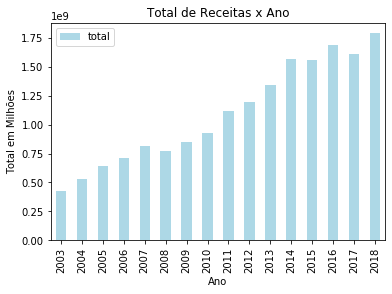

In [74]:
# Plotando gráfico: Total de recebimentos x Ano
ax = receitas_por_ano.plot(kind='bar',color='lightblue',title='Total de Receitas x Ano')

ax.set_ylabel('Total em Milhões')
ax.set_xlabel('Ano')

plt.show()

Como demonstrado no gráfico acima, o ano de 2018 foi o ano que mais acumulou receitas desde 2003. Abaixo temos um resumo de informações sobre o dados do agrupamento desses valores, como os quartis(25%,50% e 75%), a média (mean), o desvio padrão (std) e os valores máximos e mínimos.

Mais abaixo, temos um gráfico bloxplot que evidencia essas informação graficamente.

In [77]:
# Valor de receitas recebidos em 2018
em_reais(1.787108e+09)

'R$ 1.787.108.000,00'

In [42]:
# Informações sobre o desvio padrão, valores máximo e mínimo e os percentiles.
receitas_por_ano.describe()

,dt_ano,total
count,16.000000,1.600000e+01
mean,2010.500000,1.096098e+09
std,4.760952,4.466808e+08
min,2003.000000,4.269491e+08
25%,2006.750000,7.600471e+08
50%,2010.500000,1.019998e+09
75%,2014.250000,1.559869e+09
max,2018.000000,1.787108e+09


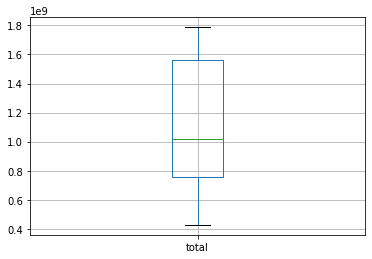

In [75]:
# Gráfico bolxplot dos totais de receitas recebidas entre os anos de 2003 e 2018
receitas_por_ano.boxplot()

#### 2. Quais os valores recebidos por mês/ano?

A análise aqui será similar a pergunta anterior, mas levando em consideração da coluna **dt_mesano** ao invés da **dt_ano**.

In [87]:
# Criar novo dataframe apenas com os dados que importam
receitas_por_mes_ano = pref_mun_joao_pessoa.drop(columns=['cd_ugestora','de_ugestora','cd_receitaorcug','de_receitaorcug','tp_atualizacaoreceita','de_atualizacaoreceita','dt_ano'])
receitas_por_mes_ano.head()

,vl_lancamentoOrc,dt_mesano
487846,112414.55,2007-01-01
487847,96588.89,2007-02-01
487848,112195.04,2007-03-01
487849,96514.83,2007-04-01
487850,100358.00,2007-05-01


In [88]:
# Agrupar e calcular a soma da coluna vl_lancamentoOrc
receitas_por_mes_ano['total'] = receitas_por_mes_ano.groupby('dt_mesano').transform('sum')
receitas_por_mes_ano = receitas_por_mes_ano.drop(columns=['vl_lancamentoOrc'])

In [89]:
# Removendo duplicatas
receitas_por_mes_ano.drop_duplicates(keep='first', inplace=True)
receitas_por_mes_ano.sort_values(by=['dt_mesano'],ascending=True,inplace=True)

In [90]:
# Definindo o mês/ano como índice
receitas_por_mes_ano.set_index('dt_mesano',inplace=True)
receitas_por_mes_ano.head()

,total
dt_mesano,
2003-01-01,46923205.80
2003-02-01,31463697.81
2003-03-01,34147830.15
2003-04-01,29138516.65
2003-05-01,38139457.19


Como os dados tratados aqui agora são os meses do ano a visualização do gráfico utilizando barras não fica bom. Portanto vou criar um gráfico em linha. Isso também irá nos ambientar para nosso futuro estudo sobre a série temporal orçamentária.

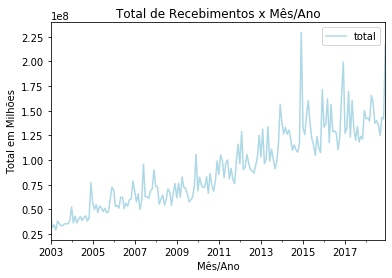

In [91]:
# Plotando gráfico: Total de recebimentos x Mês/Ano
ax = receitas_por_mes_ano.plot(kind='line',color='lightblue',title='Total de Recebimentos x Mês/Ano')

ax.set_ylabel('Total em Milhões')
ax.set_xlabel('Mês/Ano')

plt.show()

In [93]:
# Maior valor de receitas em um mês entre 2003 e 2018
em_reais(2.294779e+08)

'R$ 229.477.900,00'

In [102]:
# Mês que ocorreu o maior valor
receitas_por_mes_ano.idxmax(axis=0)

total   2014-12-01
dtype: datetime64[ns]

In [92]:
# Dados estatísticos
receitas_por_mes_ano.describe()

,total
count,1.920000e+02
mean,9.134154e+07
std,3.953522e+07
min,2.913852e+07
25%,6.025553e+07
50%,8.585041e+07
75%,1.231781e+08
max,2.294779e+08


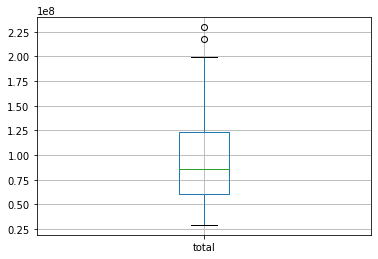

In [103]:
# Gráfico Bloxplot com os quartis, outliers, valores mínimos e máximos (desconsiderando os outliers)
receitas_por_mes_ano.boxplot()

0.8504240316671062

In [104]:
receitas_por_mes_ano.total.autocorr()

0.8504240316671062

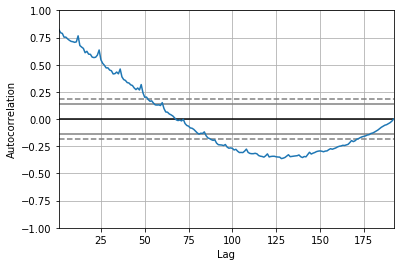

In [64]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(receitas_por_mes_ano.total)

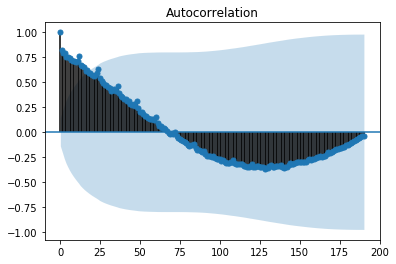

In [65]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(receitas_por_mes_ano.values.squeeze(), lags=190)
plt.show()

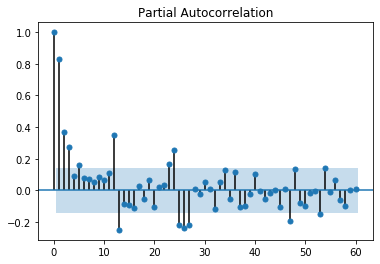

In [66]:
sm.graphics.tsa.plot_pacf(receitas_por_mes_ano.values.squeeze(), lags=60)
plt.show()

In [29]:
# Plotar esse mesmo gráfico num bloxplot, plotando os ciclos
# Em R -> boxplot(AirPassengers~cycle(AirPassengers)) para ajudar a identificar a sazonalidade no ciclo.
# ACF - Auto correlation factor, mostra se o gráfico é estacionário; Se houver uma queda, ela indica se a série
# é estacionária, se ocilar não é;
# Partial ACF -> Vai mostrar os picos dentro da séria

# Testar se a nova série é estacionária, rodar o teste ADF (Augmented Dickey-Fuller Test);

# Nesse gráfico mostra
# - Uma tendência positiva, mostrando uma séria temporal crescente;
# - Isso demostra uma série não estacionária;
# - Mostra uma aparente sazonalidade com uma variação relevante nos anos de 2015 e 2017;
# - Deve-se, portanto, calcular o ruído para ver se a média dessa ocilação positiva e negativa tende a 0;
# - Seve-se também aplicar técnicas para estacionar a série;

# - Para séries não estacionárias, no modelo ARIMA, utilizar 1 no nível de autoregressão já seria o suficiente;
'''
Etapas

- Tornar a séria estacionária - Por diferenciação
- Controlar a variação (por transformação logarítmica, a mais simples)
- Determinar se os termos autorregressivos (AR) ou de médias móveis (MA) são necessários
- Teste do Modelo, Menor AIC
- Analisar os resíduos estacionários, com média zero e variância constante = Modelo correto
'''

'\nEtapas\n\n- Tornar a séria estacionária - Por diferenciação\n- Controlar a variação (por transformação logarítmica, a mais simples)\n- Determinar se os termos autorregressivos (AR) ou de médias móveis (MA) são necessários\n- Teste do Modelo, Menor AIC\n- Analisar os resíduos estacionários, com média zero e variância constante = Modelo correto\n'